In [1]:
import numpy as np#used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A layer consists of a tensor-in tensor-out computation function
#Dense layer is the regular deeply connected neural network layer
from tensorflow.keras.layers import Dense,Flatten
#Faltten-used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D,MaxPooling2D #Convolutional layer
#MaxPooling2D-for downsampling the image
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tensorflow.__version__


'2.7.2'

In [3]:
tensorflow.keras.__version__

'2.7.0'

In [4]:
#setting parameter for Image Data agumentation to the training data
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
#Image Data agumentation to the testing data
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e19380cfd51f415b9ff56852799fca44 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Fk5LuHH1Y_OkM1k7ShevO2Q5FmH5jjeAViLcI35YrUH6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_1 = client_e19380cfd51f415b9ff56852799fca44.get_object(Bucket='handwrittendigitrecognition-donotdelete-pr-i2wwewqakwzwwp', Key='ibm dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [6]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r') 
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [7]:
pwd

'/home/wsuser/work'

In [8]:
x_train = train_datagen.flow_from_directory(r'/home/wsuser/work/ibm dataset/trainingSet',target_size=(64, 64),batch_size=5,
                                            color_mode='rgb',class_mode='categorical')
#performing data agumentation to test data
x_test = test_datagen.flow_from_directory(r'/home/wsuser/work/ibm dataset/testSet',target_size=(64, 64),batch_size=5,
                                            color_mode='rgb',class_mode='categorical') 

Found 84000 images belonging to 11 classes.
Found 28000 images belonging to 1 classes.


In [9]:
 x_train.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'trainingSet': 10}

In [10]:
model = Sequential()

In [11]:
from keras.layers import Convolution2D

In [12]:
model.add(Convolution2D(32,(3,3),input_shape = (64,64,3),activation = "relu"))

In [13]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [14]:
import tensorflow as tf

In [15]:
from tensorflow.keras.layers import Dropout

In [16]:
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [17]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [18]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [19]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [20]:
x_train /= 255
x_test /= 255

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2151 - accuracy: 0.9353
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0838 - accuracy: 0.9741
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0603 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0445 - accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0365 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0293 - accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0264 - accuracy: 0.99 - 38s 20ms/step - loss: 0.0264 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0224 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0198 - accuracy: 0.9932
Epoch 10/10
1875/1875 

In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0663 - accuracy: 0.9844


[0.06628963351249695, 0.9843999743461609]

9


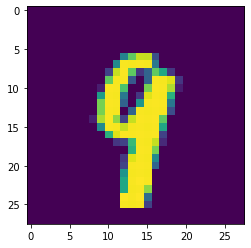

In [24]:
import matplotlib.pyplot as plt
import numpy as np
image_index = 3970
plt.imshow(x_test[image_index].reshape(28, 28))
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [25]:
model.save("digit.h5")

In [26]:
!tar -zcvf digit-recognition-model_new.tgz digit.h5

digit.h5


In [27]:
ls

 digit.h5   digit-recognition-model_new.tgz  'ibm dataset'/


In [41]:
 !pip install watson-machine-learning-client --upgrade

In [42]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
          "url":"https://us-south.ml.cloud.ibm.com",
          "apikey":"ST6nc8Ub-o1zZyywCCJ7AdZQWSezUPtVZUwLI8g4u24D"
  }


In [43]:
client = APIClient(wml_credentials)

In [48]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()    
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [49]:
space_uid = guid_from_space_name(client,'digit')
print("Space UID = " + space_uid)

Space UID = 314c7688-f90c-4749-94e3-bd415d45921d


In [50]:
client.set.default_space(space_uid)

'SUCCESS'

In [51]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [75]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [76]:
model_details = client.repository.store_model(model='digit-recognition-model_new.tgz',meta_props={
client.repository.ModelMetaNames.NAME:"DigitRecognition",
client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [77]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-18T10:38:24.017Z',
  'id': '9a06ac5b-8a21-4b6d-9583-2033f65704b7',
  'modified_at': '2022-11-18T10:38:26.976Z',
  'name': 'DigitRecognition',
  'owner': 'IBMid-66800049M2',
  'resource_key': 'a44946e4-a5b7-4289-9a53-49d0101ad878',
  'space_id': '314c7688-f90c-4749-94e3-bd415d45921d'},
 'system': {'warnings': []}}

In [78]:
model_id = client.repository.get_model_id(model_details)
model_id

'9a06ac5b-8a21-4b6d-9583-2033f65704b7'

In [79]:
client.repository.download(model_id,'DigitRecognition_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecognition_IBM_model.tar.gz'


'/home/wsuser/work/DigitRecognition_IBM_model.tar.gz'

In [80]:
ls

 digit.h5                            digit-recognition-model_new.tgz
 DigitRecognition_IBM_model.tar.gz  'ibm dataset'/


In [81]:


from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np



In [83]:
model = load_model("digit.h5")

In [ ]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
metadata_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-634faf54-056f-41f4-97a7-f0c18723d460',
    'IBM_API_KEY_ID': 'Fk5LuHH1Y_OkM1k7ShevO2Q5FmH5jjeAViLcI35YrUH6',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'handwrittendigitrecognition-donotdelete-pr-i2wwewqakwzwwp',
    'FILE': 'six.jpg'
}


In [86]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Fk5LuHH1Y_OkM1k7ShevO2Q5FmH5jjeAViLcI35YrUH6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittendigitrecognition-donotdelete-pr-i2wwewqakwzwwp'
object_key = 'six.jpg'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [87]:
img = Image.open(streaming_body_3).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [88]:


img



In [89]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [90]:
pred = model.predict(im2arr)
print(pred)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.5401984e-08 0.0000000e+00 1.0000000e+00 0.0000000e+00 5.7164700e-29]]


In [91]:
print(np.argmax(pred, axis=1)) #printing our Labels

[7]
